# Google Play Store Apps Data
### Exploratory Data Analysis

## 1. Contents
https://www.kaggle.com/lava18/google-play-store-apps

## 2. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pylab import rcParams

## 3. Objectives 


## 4. Load Google Play Store Apps Data

In [2]:
data = pd.read_csv('googleplaystore.csv')
data.shape

(10841, 13)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Except for the "Rating" (float64) all the columns are object.

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


## 5. Explore the Data

### 5-1. Number of Missing Values by Column

In [5]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Rating,1474,13.596532
Current Ver,8,0.073794
Android Ver,3,0.027673
Type,1,0.009224
Content Rating,1,0.009224
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000


Rating has the most missing value, at around 13.6%.

In [6]:
# Drop NAs?
#data.dropna(how ='any', inplace = True)

In [7]:
#missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
#missing.columns=['count', '%']
#missing.sort_values(by='count', ascending=False)

In [8]:
data.shape

(10841, 13)

### 5-2. "App" 

In [9]:
data['App'].describe()

count      10841
unique      9660
top       ROBLOX
freq           9
Name: App, dtype: object

In [10]:
# Unique "App" names
data['App'].value_counts().head(20)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Bubble Shooter                                        6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
Bowmasters                                            6
slither.io                                            6
Temple Run 2                                          6
Helix Jump                                            6
Zombie Catchers                                       6
Nick                                                  6
Bleacher Report: sports news, scores, & highlights    6
Subway Surfers                                        6
eBay: Buy & Sell this Summer - Discover Deals Now!    5
Farm Heroes Saga                                

There are multiple entries of the apps of the same names.

- What should be done to fix this?

In [11]:
# Set Index
data.set_index("App", inplace=True)
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


### 5-3. Category

In [12]:
data['Category'].describe()

count      10841
unique        34
top       FAMILY
freq        1972
Name: Category, dtype: object

In [13]:
# Unique "Cateogry"
data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [14]:
print(len(data['Category'].unique()) , "categories")

34 categories


There is one category called "1.9" which looks like a mistake. 

In [15]:
data[data['Category']=='1.9']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


It seems that the info has not been properly entered into correct columns. So I decided to drop this row. 


In [16]:
# drop incorrect row
data.drop(data.index[data['Category'] == '1.9'], inplace = True)
data[data['Category']=='1.9']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,


##### Bar Plot: Distribution of Different Categories

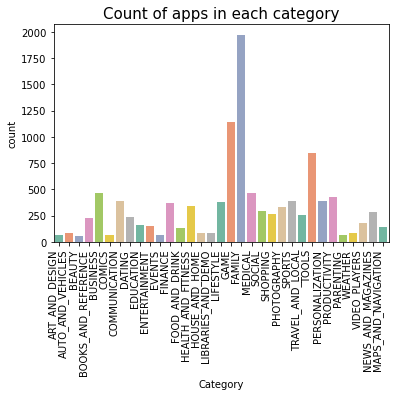

In [17]:
gc = sns.countplot(x="Category",data=data, palette = "Set2");
gc.set_xticklabels(gc.get_xticklabels(), rotation=90, ha="right");
gc
plt.title('Count of apps in each category',size = 15);

Category "Family" has the highest counts of apps, followed by "Games" and "Personalization."

### 5-4. Genres

In [18]:
data['Genres'].describe()

count     10840
unique      119
top       Tools
freq        842
Name: Genres, dtype: object

In [19]:
# Unique "Genres"
data['Genres'].value_counts()

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
                                      ... 
Travel & Local;Action & Adventure        1
Card;Brain Games                         1
Entertainment;Education                  1
Strategy;Education                       1
Health & Fitness;Action & Adventure      1
Name: Genres, Length: 119, dtype: int64

In [20]:
print( len(data['Genres'].unique()) , "genres")

119 genres


##### Bar Plot: Distribution of Different Genres

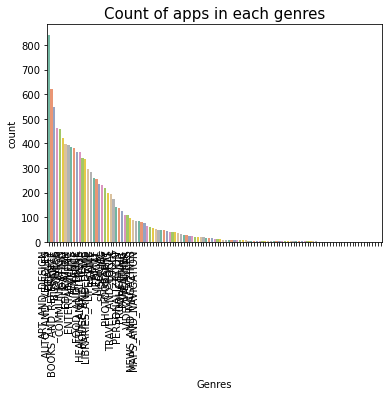

In [21]:
gg = sns.countplot(x="Genres",data=data, palette = "Set2",order=data['Genres'].value_counts().index);
gg.set_xticklabels(gc.get_xticklabels(), rotation=90, ha="right");
gg
plt.title('Count of apps in each genres',size = 15);

We can see that there is skewed distribution for "Genres," which can be a potential cause for a bias. Therefore, decided to get rid of the sub genres (that starts after ";") and just use the bigger genres.

In [22]:
data['Genres'] = data['Genres'].str.split(';').str[0]

In [23]:
print( len(data['Genres'].unique()) , "genres")
print("\n", data['Genres'].unique())

48 genres

 ['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


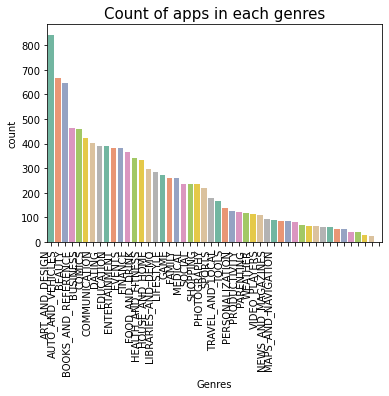

In [24]:
gg = sns.countplot(x="Genres",data=data, palette = "Set2",order=data['Genres'].value_counts().index);
gg.set_xticklabels(gc.get_xticklabels(), rotation=90, ha="right");
gg
plt.title('Count of apps in each genres',size = 15);

Some of the Categories and Genres have overlap in values. 

### Genres and Category

In [25]:
(data[data.Category != data.Genres]
 .groupby('Category')['Genres']
 .value_counts())

Category             Genres                 
ART_AND_DESIGN       Art & Design                65
AUTO_AND_VEHICLES    Auto & Vehicles             85
BEAUTY               Beauty                      53
BOOKS_AND_REFERENCE  Books & Reference          231
BUSINESS             Business                   460
                                               ... 
SPORTS               Sports                     384
TOOLS                Tools                      843
TRAVEL_AND_LOCAL     Travel & Local             258
VIDEO_PLAYERS        Video Players & Editors    175
WEATHER              Weather                     82
Name: Genres, Length: 71, dtype: int64

In [26]:
data[['Category', 'Genres']].nunique()

Category    33
Genres      48
dtype: int64

In [27]:
data[data.Category != data.Genres]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design,15-Jan-18,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up


### 5-5. Rating

In [28]:
data['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [29]:
# Unique "Rating"
data['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

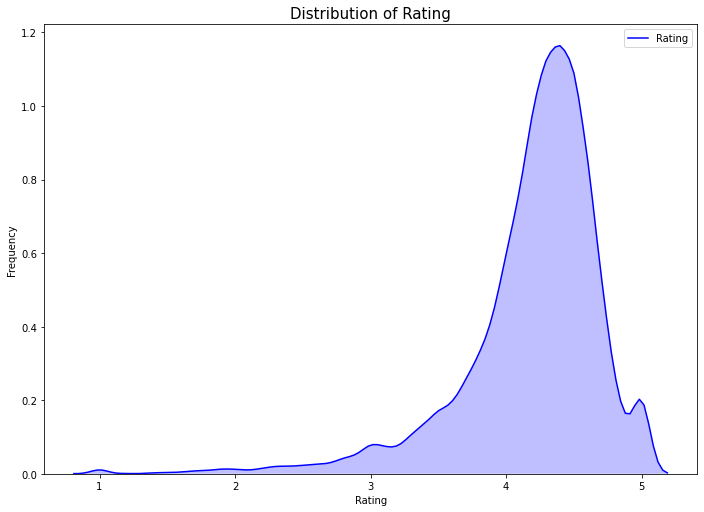

In [30]:
rcParams['figure.figsize'] = 11.7,8.27;
gr = sns.kdeplot(data.Rating, color="blue", shade = True);
gr.set_xlabel("Rating");
gr.set_ylabel("Frequency");
plt.title('Distribution of Rating',size = 15);

In [31]:
data.Rating.mean()

4.191757420456978

Rating had 13.6% of its data missing. 

In [32]:
data['Rating'].isna

<bound method Series.isna of App
Photo Editor & Candy Camera & Grid & ScrapBook        4.1
Coloring book moana                                   3.9
U Launcher Lite – FREE Live Cool Themes, Hide Apps    4.7
Sketch - Draw & Paint                                 4.5
Pixel Draw - Number Art Coloring Book                 4.3
                                                     ... 
Sya9a Maroc - FR                                      4.5
Fr. Mike Schmitz Audio Teachings                      5.0
Parkinson Exercices FR                                NaN
The SCP Foundation DB fr nn5n                         4.5
iHoroscope - 2018 Daily Horoscope & Astrology         4.5
Name: Rating, Length: 10840, dtype: float64>

### 5-6. Content Rating

In [33]:
data['Content Rating'].describe()

count        10840
unique           6
top       Everyone
freq          8714
Name: Content Rating, dtype: object

In [34]:
# Unique "Content Rating"
data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

### Barplot: Content Rating

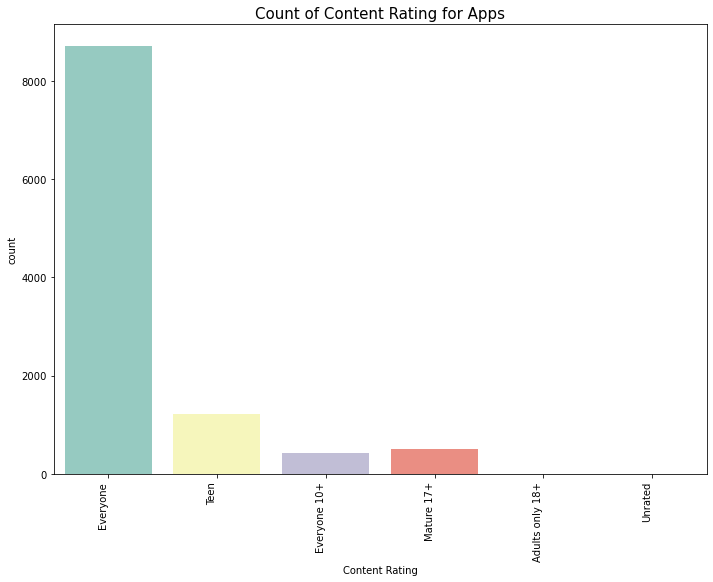

In [35]:
gcr = sns.countplot(x="Content Rating",data=data, palette = "Set3");
gcr.set_xticklabels(gcr.get_xticklabels(), rotation=90, ha="right");
gcr
plt.title('Count of Content Rating for Apps',size = 15);

There are 2 entries of "Unrated," and 3 entries of "Adults only 18+."

In [36]:
data[data['Content Rating']=='Unrated']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Best CG Photography,FAMILY,NaN,1,2.5M,500+,Free,0,Unrated,Entertainment,24-Jun-15,5.2,3.0 and up
DC Universe Online Map,TOOLS,4.1,1186,6.4M,"50,000+",Free,0,Unrated,Tools,27-Feb-12,1.3,2.3.3 and up


In [37]:
data[data['Content Rating']=='Adults only 18+']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Manga Master - Best manga & comic reader,COMICS,4.6,24005,4.9M,"500,000+",Free,0,Adults only 18+,Comics,4-Jul-18,1.1.7.0,4.1 and up
DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41M,"1,000,000+",Free,0,Adults only 18+,Sports,24-Jul-18,3.21.324,4.4 and up
Manga Books,COMICS,3.8,7326,Varies with device,"500,000+",Free,0,Adults only 18+,Comics,3-Aug-18,Varies with device,Varies with device


Are there any relationship between "Rating" and "Content Rating"?

#### Boxplot of Rating and Content Rating

Text(0.5, 1.0, 'Box plot Rating vs. Content Rating')

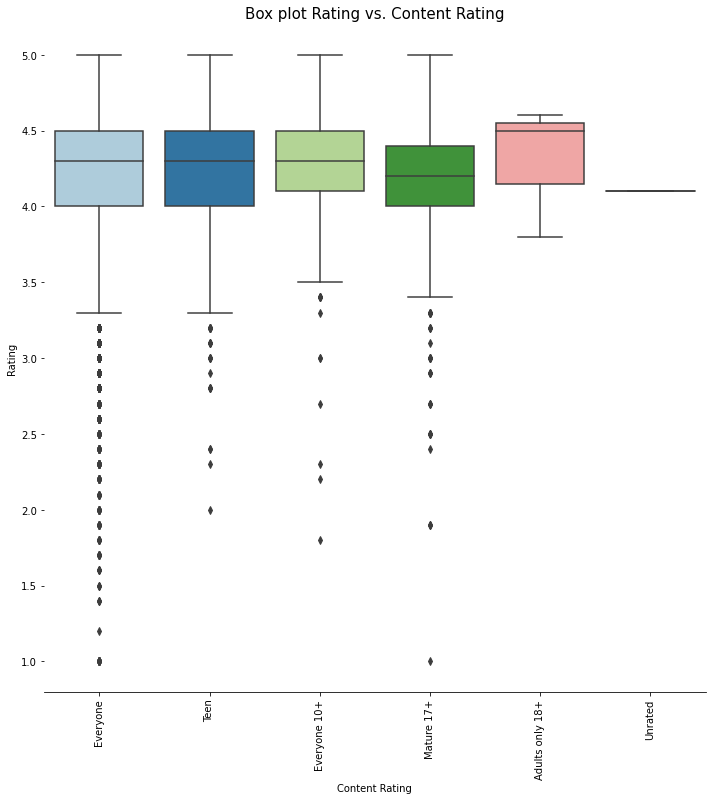

In [38]:
grcr = sns.catplot(x="Content Rating",y="Rating",data=data, kind="box", height = 10 ,palette = "Paired")
grcr.despine(left=True)
grcr.set_xticklabels(rotation=90)
grcr = grcr.set_ylabels("Rating")
plt.title('Box plot Rating vs. Content Rating',size = 15)

There was no noticeable pattern in rating in terms of content rating.

### 5-7. Reviews

In [39]:
data['Reviews'].describe()

count     10840
unique     6001
top           0
freq        596
Name: Reviews, dtype: object

In [40]:
# Convert "Reviews" into integers
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))
data['Reviews'].head()

App
Photo Editor & Candy Camera & Grid & ScrapBook           159
Coloring book moana                                      967
U Launcher Lite – FREE Live Cool Themes, Hide Apps     87510
Sketch - Draw & Paint                                 215644
Pixel Draw - Number Art Coloring Book                    967
Name: Reviews, dtype: int64

In [41]:
# Unique "Reviews"
data['Reviews'].value_counts()

0          596
1          272
2          214
3          175
4          137
          ... 
155693       1
12443        1
163997       1
37023        1
1385093      1
Name: Reviews, Length: 6001, dtype: int64

#### Distribution of Number of Reviews

Text(0.5, 1.0, 'Distribution of Reveiw')

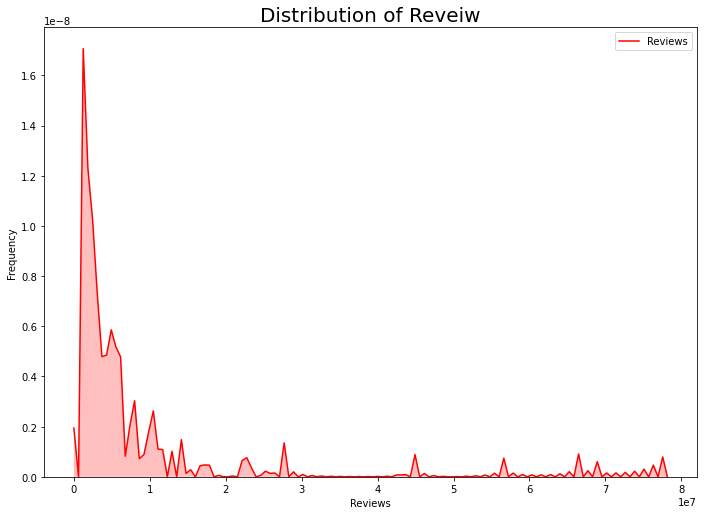

In [42]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data.Reviews, color="Red", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)

### 5-8. Size

In [43]:
data['Size'].describe()

count                  10840
unique                   461
top       Varies with device
freq                    1695
Name: Size, dtype: object

In [44]:
# Unique "Size"
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Can see that there are values with different measurement (i.e. ks and Ms) and some values "Varies with device."

In [45]:
data['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
122k                     1
404k                     1
655k                     1
518k                     1
Name: Size, Length: 461, dtype: int64

In [46]:
data[data['Size']== 'Varies with device']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,14-Jul-18,Varies with device,2.3.3 and up
Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,30-Jul-18,Varies with device,Varies with device
Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,25-May-18,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...
My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,24-Jul-18,Varies with device,Varies with device
Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,27-Sep-17,Varies with device,4.4 and up
Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,23-May-18,Varies with device,Varies with device


In [47]:
# Removing "M"s and replace "k" by dividing it by 1000 -  cpmvert it to Ms
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

data['Size'] = data['Size'].apply(lambda x: float(x))

In [48]:
data['Size'].value_counts()

11.000    198
12.000    196
14.000    194
13.000    191
15.000    184
         ... 
0.027       1
0.642       1
0.647       1
0.039       1
0.942       1
Name: Size, Length: 459, dtype: int64

In [49]:
data[data['Size']== 'Varies with device']

C:\Users\chloe\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,


In [50]:
data[data['Size']== 'NaN']

C:\Users\chloe\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,


In [51]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design,15-Jan-18,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design,20-Jun-18,1.1,4.4 and up


### 5-9. Installs

In [52]:
data['Installs'].describe()

count          10840
unique            21
top       1,000,000+
freq            1579
Name: Installs, dtype: object

In [53]:
# Unique "Installs"
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [54]:
data['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [55]:
# Remove "+"s
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x))

Note that 0+ is merged with 0s.

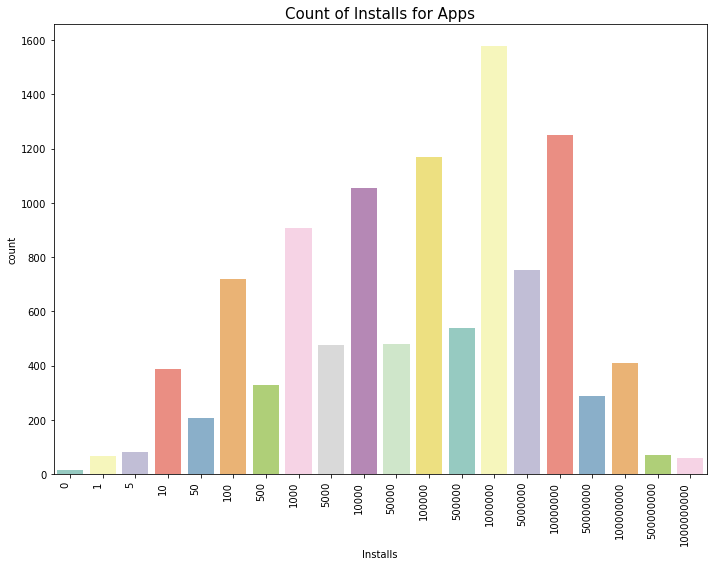

In [56]:
gi = sns.countplot(x="Installs",data=data, palette = "Set3");
gi .set_xticklabels(gi.get_xticklabels(), rotation=90, ha="right");
gi
plt.title('Count of Installs for Apps',size = 15);

### 5-10. Type

In [57]:
data['Type'].describe()

count     10839
unique        2
top        Free
freq      10039
Name: Type, dtype: object

In [58]:
# Unique "Type"
data['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [59]:
data['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

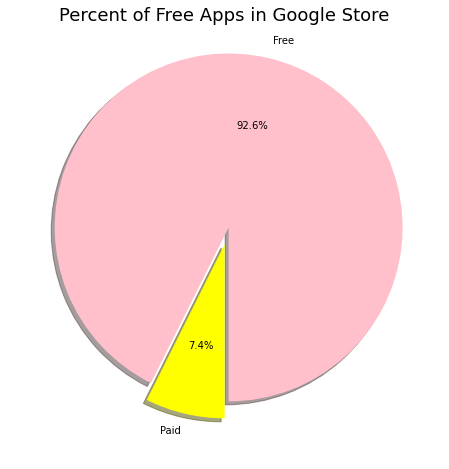

In [60]:
# Plot pie chart
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)

colors = ["pink","yellow"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free Apps in Google Store',size = 18)
plt.show()

In [61]:
# 0 - Free, 1 - Paid
# df['Type'] = pd.factorize(df['Type'])[0]
#print(df.dtypes)

### 5-11. Price

In [62]:
data['Price'].describe()

count     10840
unique       92
top           0
freq      10040
Name: Price, dtype: object

In [63]:
# Unique "Price"
data['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [64]:
# Remove the dollar sign and make the variable float
data.Price = data.Price.apply(lambda x: x.replace('$',''))
data['Price'] = data['Price'].apply(lambda x: float(x))

In [65]:
data['Price'].describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

Max for price is $400!

In [66]:
data['Price'].value_counts()

0.00    10040
0.99      148
2.99      129
1.99       73
4.99       72
        ...  
1.20        1
1.59        1
2.56        1
1.61        1
1.04        1
Name: Price, Length: 92, dtype: int64

### 5-12. Last Updated

In [67]:
data['Last Updated'].describe()

count        10840
unique        1377
top       3-Aug-18
freq           326
Name: Last Updated, dtype: object

In [68]:
# Unique "Installs"
data['Last Updated'].unique()

array(['7-Jan-18', '15-Jan-18', '1-Aug-18', ..., '20-Jan-14', '16-Feb-14',
       '23-Mar-14'], dtype=object)

In [69]:
data['Last Updated'].value_counts()

3-Aug-18     326
2-Aug-18     304
31-Jul-18    294
1-Aug-18     285
30-Jul-18    211
            ... 
31-Jul-13      1
5-Feb-15       1
24-Aug-12      1
25-Mar-14      1
4-Aug-14       1
Name: Last Updated, Length: 1377, dtype: int64

In [70]:
#Convert to datetime object
data['new'] = pd.to_datetime(data['Last Updated'])
data['new'].describe()

count                   10840
unique                   1377
top       2018-08-03 00:00:00
freq                      326
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: new, dtype: object

In [71]:
data['new'].max() 

Timestamp('2018-08-08 00:00:00')

### 5-13. Current Ver

In [72]:
data['Current Ver'].describe()

count                  10832
unique                  2783
top       Varies with device
freq                    1459
Name: Current Ver, dtype: object

In [73]:
# Unique "Current Ver"
data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

### 5-14. Android Ver

In [74]:
data['Android Ver'].describe()

count          10838
unique            33
top       4.1 and up
freq            2451
Name: Android Ver, dtype: object

In [75]:
# Unique "Android Ver"
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

Potential Questions:

## Rating vs. Review
Apps with more reviews tend to have better rating

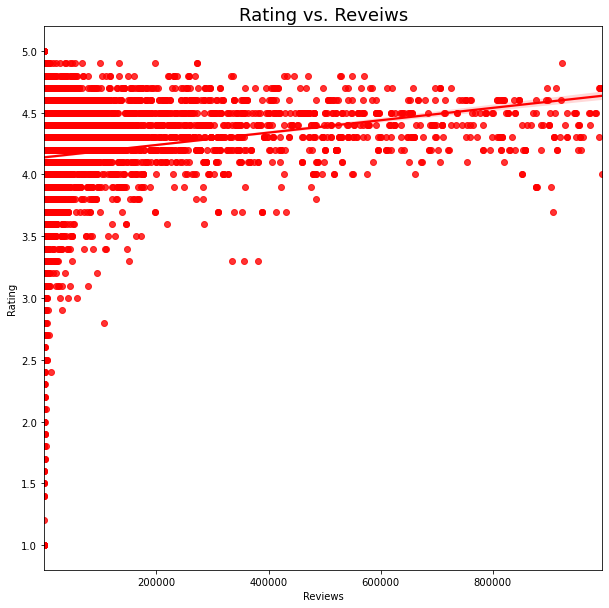

In [76]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'red',data=data[data['Reviews']<1000000]);
plt.title('Rating vs. Reveiws',size = 18);

## Rating vs. Price
Expensive apps tend to have lower rating

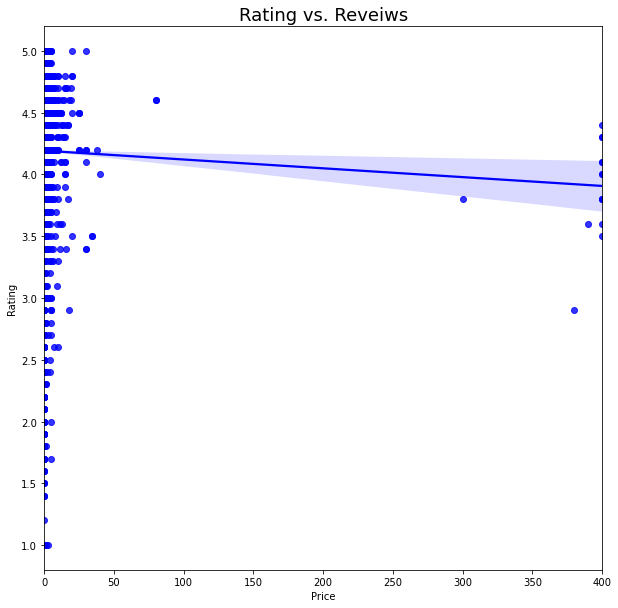

In [77]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'blue',data=data[data['Price']<1000000]);
plt.title('Rating vs. Reveiws',size = 18);

## Rating vs. Installs
Apps with larger number of installs have greater rating

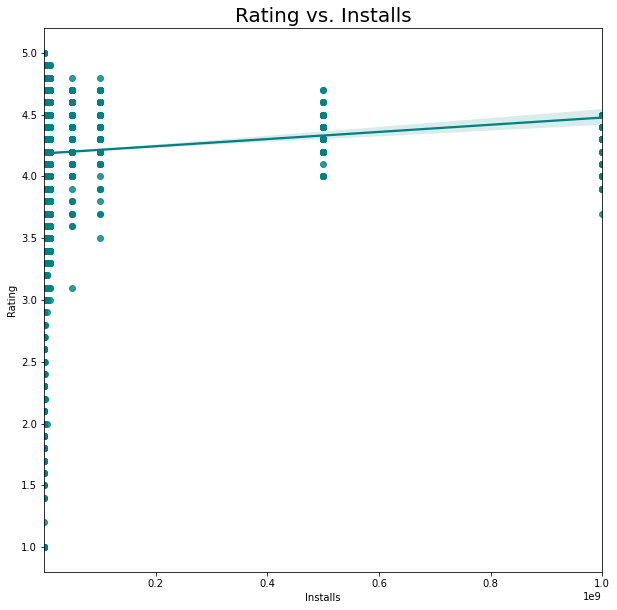

In [78]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data);
plt.title('Rating vs. Installs',size = 20);

## Rating vs. Last Updated

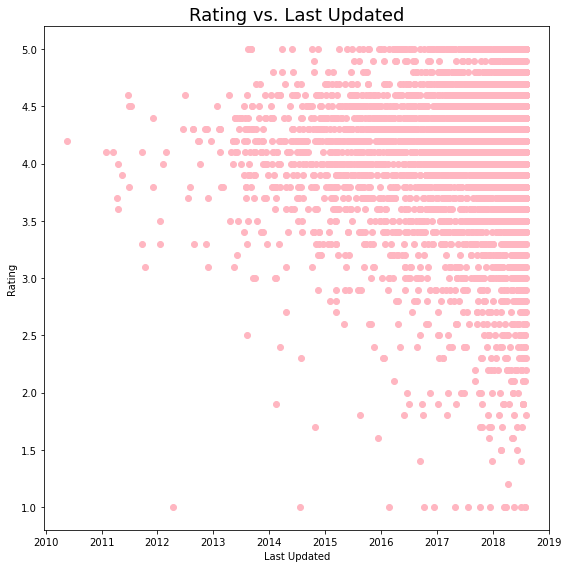

In [79]:
plt.plot_date(data["new"],data["Rating"],color = 'lightpink')
plt.title('Rating vs. Last Updated',size = 18);
plt.xlabel('Last Updated');
plt.ylabel('Rating');
plt.tight_layout();
plt.show();

## Last Updated vs. Reviews

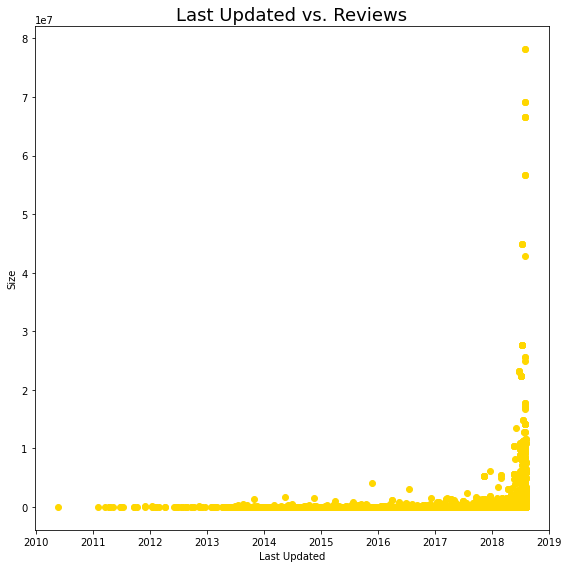

In [87]:
plt.plot_date(data["new"],data["Reviews"],color = 'gold')
plt.title('Last Updated vs. Reviews',size = 18);
plt.xlabel('Last Updated');
plt.ylabel('Size');
plt.tight_layout();
plt.show();

## Last Updated vs. Price

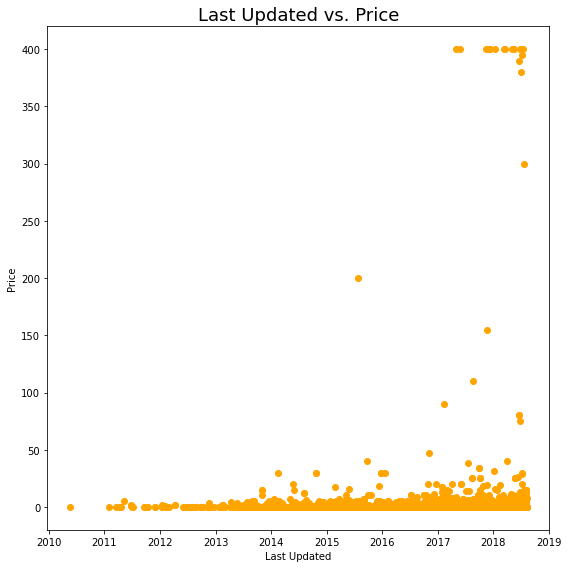

In [80]:
plt.plot_date(data["new"],data["Price"],color = 'orange')
plt.title('Last Updated vs. Price',size = 18);
plt.xlabel('Last Updated');
plt.ylabel('Price');
plt.tight_layout();
plt.show();

## Last Updated vs. Installs

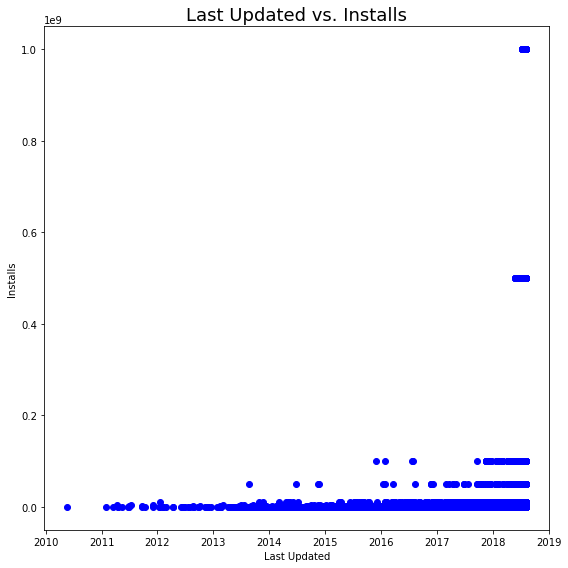

In [85]:
plt.plot_date(data["new"],data["Installs"],color = 'blue')
plt.title('Last Updated vs. Installs',size = 18);
plt.xlabel('Last Updated');
plt.ylabel('Installs');
plt.tight_layout();
plt.show();

## Last Updated vs. Size

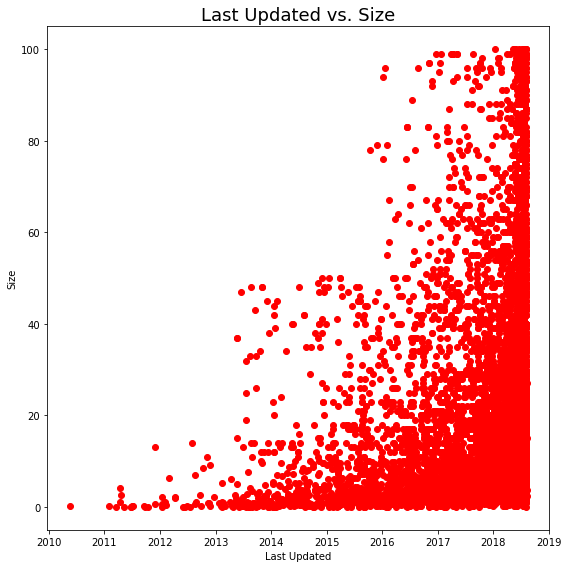

In [84]:
plt.plot_date(data["new"],data["Size"],color = 'red')
plt.title('Last Updated vs. Size',size = 18);
plt.xlabel('Last Updated');
plt.ylabel('Size');
plt.tight_layout();
plt.show();

## Given all these variables, can we predict when someone updates for the last time?